In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
#Checking the hsape of the train and test data
train.shape
test.shape


(10086, 12)

In [4]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [5]:
#Getting a fair knowledge of the data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Checking for missing values
print( train.isnull().sum())

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [7]:
#show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


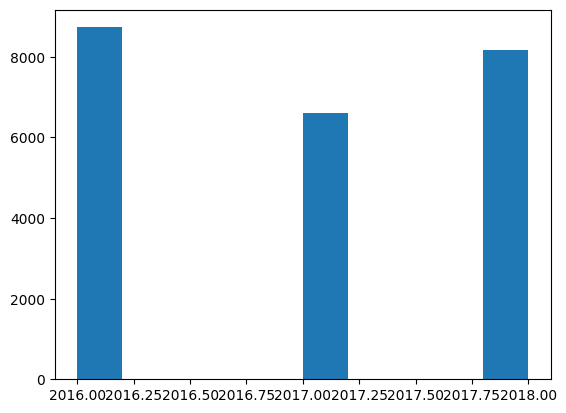

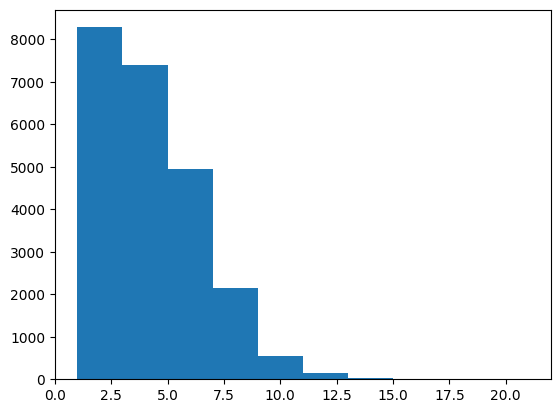

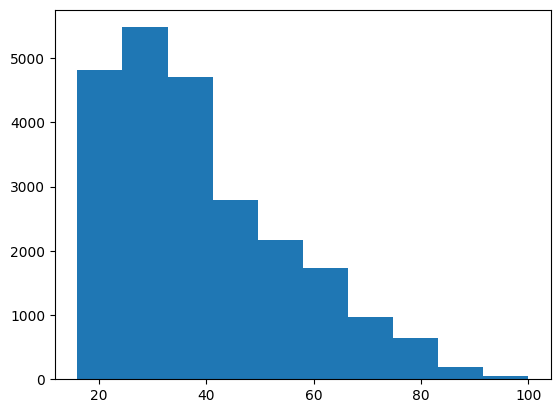

In [8]:
#visualizing numeric data
plt.hist(train.year)
plt.show()
plt.hist(train.household_size)
plt.show()
plt.hist(train.age_of_respondent)
plt.show()


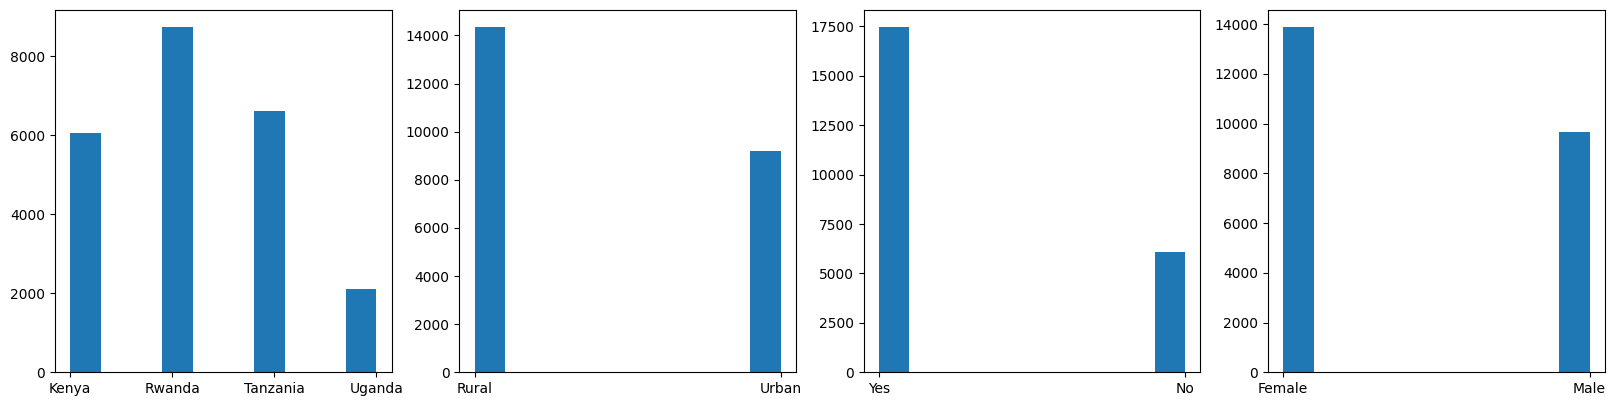

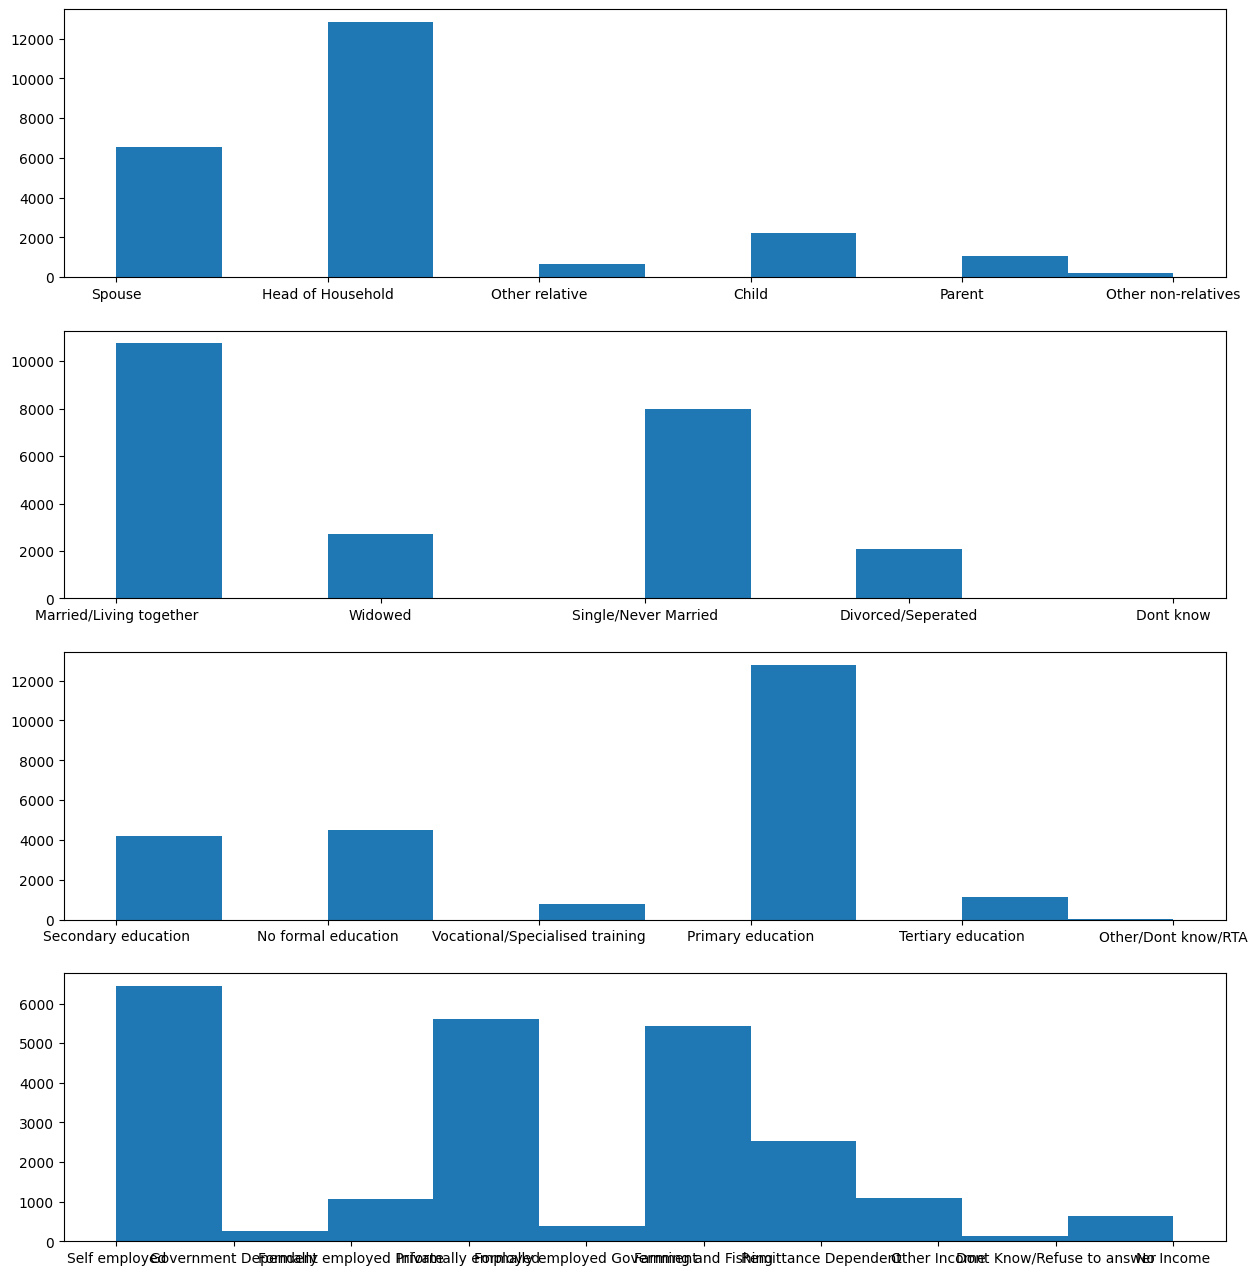

In [9]:
#Visualizing categorical data
plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
plt.hist(train.country)
plt.subplot(3,4,2)
plt.hist(train.location_type)
plt.subplot(3,4,3)
plt.hist(train.cellphone_access)
plt.subplot(3,4,4)
plt.hist(train.gender_of_respondent)

plt.show()

#I decided to seprate them because the x values were crowded
plt.figure(figsize=(15,16))
plt.subplot(4,1,1)
plt.hist(train.relationship_with_head)
plt.subplot(4,1,2)
plt.hist(train. marital_status)
plt.subplot(4,1,3)
plt.hist(train.education_level)
plt.subplot(4,1,4)
plt.hist(train.job_type )

plt.show()

In [10]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [11]:
# Checking the perentage of ppl with account and those without
total_ids = y_train.value_counts().sum()
with_acc  = ((y_train == 1).sum())/ total_ids * 100
print(with_acc)

without_acc = ((y_train == 0).sum())/ total_ids * 100
print(without_acc)

14.079238224791702
85.9207617752083


<function matplotlib.pyplot.show(close=None, block=None)>

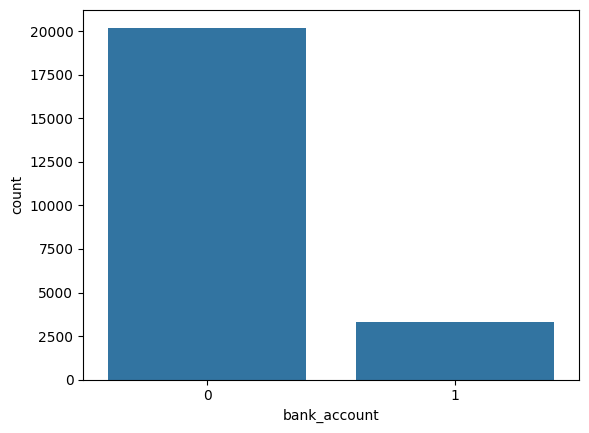

In [12]:
# Visualizing label data
sns.countplot(data=train, x=y_train)
plt.show

<Axes: >

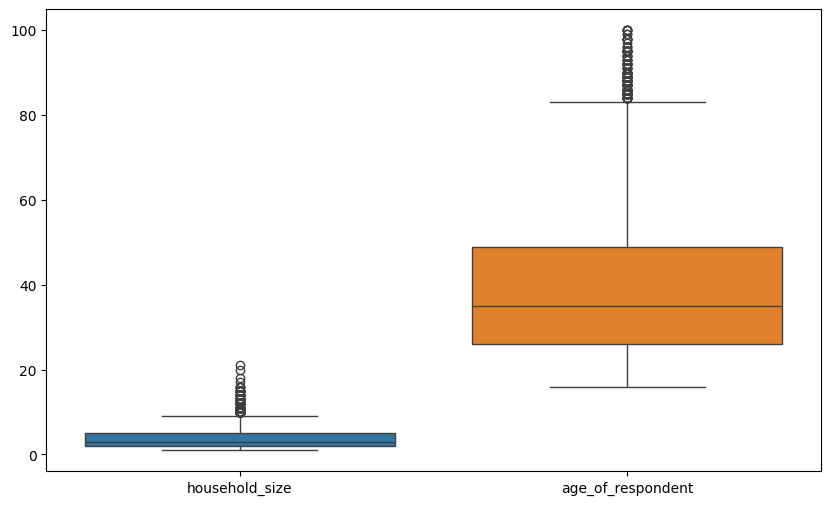

In [13]:
#outliers visualisation
numeric_columns = X_train.loc[:,["household_size","age_of_respondent"]]
plt.figure(figsize=(10,6))
sns.boxplot(data= numeric_columns.astype(int))

In [14]:
#Outlier detection and treatment
for feature in numeric_columns:
    upper_limit = numeric_columns[feature].mean()  + 3 * numeric_columns[feature].std()
    lower_limit = numeric_columns[feature].mean()  - 3 * numeric_columns[feature].std()
    print("upper limit is ",  upper_limit)
    print("lower limit is ",  lower_limit)
    print()

#From the boxplot we see that there are no outliers in the lower limit so we exclude it
    
    for i in range(len(numeric_columns)):
        if numeric_columns.loc[i,feature] > upper_limit :
            numeric_columns.loc[i,feature]  = numeric_columns[feature].median()
    

upper limit is  10.480321751867283
lower limit is  -2.8853549094935365

upper limit is  88.36692698985456
lower limit is  -10.756486588562261



In [15]:
#Confirming if the outlier treatment worked
numeric_columns.describe()

,household_size,age_of_respondent
count,23524.000000,23524.000000
mean,3.722156,38.557558
std,2.087366,16.137496
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,10.000000,88.000000


In [16]:
#reasignning numeric columns back to X_train
X_train.loc[ : ,["household_size","age_of_respondent"]] = numeric_columns

<Axes: >

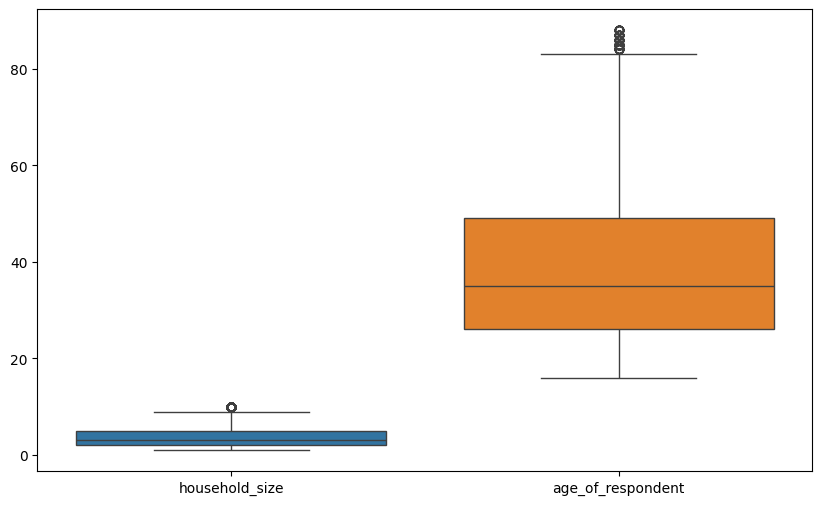

In [17]:
# after outliers treatment
numeric_columns = X_train.loc[ : ,["household_size","age_of_respondent"]]
plt.figure(figsize=(10,6))
sns.boxplot(data= numeric_columns.astype(int))

In [18]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [19]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [20]:
# Split train_data
# with the strtify in place i had no need handle the imbslsncein the label
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [21]:
print(X_Train.shape)
print(y_Train.shape)
print(X_Val.shape)

(21171, 37)
(21171,)
(2353, 37)


In [22]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_Train,y_Train)

LogisticRegression(class_weight='balanced')

In [23]:
y_pred = (model.predict_proba(X_Val)[: ,1] >= 0.572).astype(int)
print(y_pred[0:20])
print(len(y_pred))


[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
2353


In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print("Accuracy",
accuracy_score(y_val,y_pred))
print("Precision",
precision_score(y_val,y_pred))
print("Recall",
recall_score(y_val,y_pred))
print("F1 score",
f1_score(y_val,y_pred))
print("ROC - AUC",
roc_auc_score(y_val,model.predict_proba(X_Val)[:, 1]))

Accuracy 0.8334041648958777
Precision 0.4427767354596623
Recall 0.7129909365558912
F1 score 0.5462962962962963
ROC - AUC 0.864732653799146


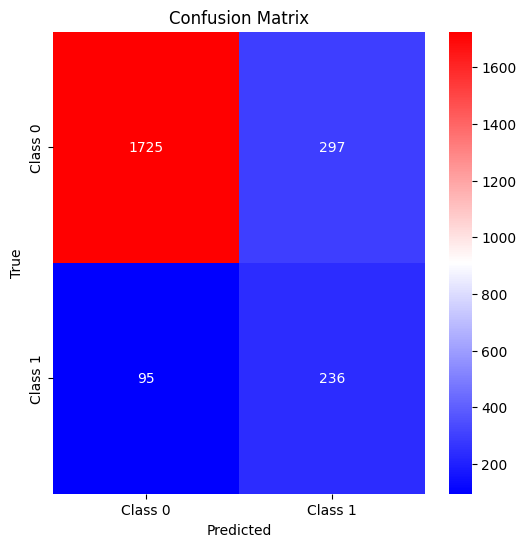

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

  # Make predictions on validation data
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='bwr', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Get the predicted result for the test Data
test.bank_account = model.predict(processed_test)

C:\Users\Mac tarvisH\AppData\Local\Temp\ipykernel_6424\564590439.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = model.predict(processed_test)


In [27]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})


In [28]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
4871,uniqueid_11006 x Rwanda,0
9785,uniqueid_2702 x Uganda,0
3945,uniqueid_10080 x Rwanda,0
8500,uniqueid_8775 x Tanzania,0
7035,uniqueid_7310 x Tanzania,0


In [29]:
import shutil
# Create submission csv file csv file
submission.to_csv('finanical_inclusion.csv', index = False)
print("File saved as 'finanical_inclusion.csv'") 

File saved as 'finanical_inclution_result.csv'
